In [70]:
from copy import deepcopy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [71]:
df = pd.DataFrame({
'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72], 
'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
})

In [82]:
np.random.seed(200)
k=3
#centroids[i] = [x, y]
# Return random integers
centroids = {
i+1:[np.random.randint(0, 80), np.random.randint(0, 80)]
    for i in range(k)
}
print("Centroid=",centroids)

Centroid= {1: [26, 16], 2: [68, 42], 3: [55, 76]}


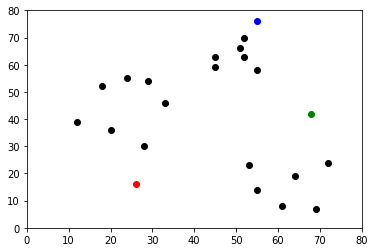

In [85]:
plt.scatter(df['x'], df['y'], color='black') 
colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys(): 
    plt.scatter(*centroids[i], color=colmap[i])
#object that displays a list of all the keys. 
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()
#represent color centroid .. 
# .keys() returns a view

In [103]:
def assignment(df, centroids):
    for i in centroids.keys():
        df['distance_from_{}'.format(i)] =( np.sqrt( (df['x'] - centroids[i][0]) ** 2 + (df['y'] - centroids[i][1]) ** 2 ))
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df  

In [104]:
df = assignment(df, centroids)
print(df)

     x   y  distance_from_1  distance_from_2  distance_from_3  closest color  \
0   12  39        26.925824        56.080300        56.727418        1     r   
1   20  36        20.880613        48.373546        53.150729        1     r   
2   28  30        14.142136        41.761226        53.338541        1     r   
3   18  52        36.878178        50.990195        44.102154        1     r   
4   29  54        38.118237        40.804412        34.058773        3     b   
5   33  46        30.805844        35.227830        37.202150        1     r   
6   24  55        39.051248        45.880279        37.443290        3     b   
7   45  59        47.010637        28.600699        19.723083        3     b   
8   45  63        50.695167        31.144823        16.401219        3     b   
9   52  70        59.933296        32.249031         6.708204        3     b   
10  51  66        55.901699        29.410882        10.770330        3     b   
11  52  63        53.712196        26.40

In [76]:
import copy
old_centroids = copy.deepcopy(centroids) # create bindings between a target and an object.

In [77]:
def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k
centroids = update(centroids)
print("Updtaed centroids ", centroids)


Updtaed centroids  {1: [27.666666666666668, 36.166666666666664], 2: [63.8, 16.2], 3: [44.125, 61.0]}


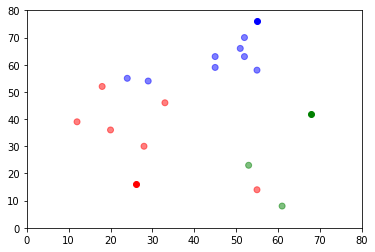

In [106]:
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5) # alpha value for intensity
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

['distance_from_1', 'distance_from_2', 'distance_from_3']


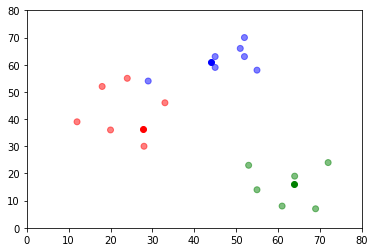

['distance_from_1', 'distance_from_2', 'distance_from_3']


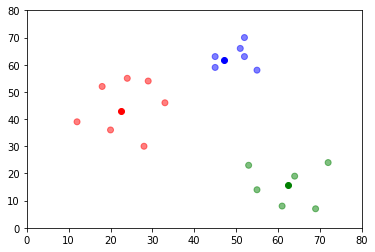

['distance_from_1', 'distance_from_2', 'distance_from_3']


In [79]:
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break
    plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5)
    for i in centroids.keys():
        plt.scatter(*centroids[i], color=colmap[i]) 
    plt.xlim(0, 80)
    plt.ylim(0, 80)
    plt.show()

In [80]:
df1 = pd.DataFrame({
'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72], 
'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
})

In [81]:
from sklearn.cluster import KMeans

In [62]:
kmeans=KMeans(n_clusters=3)

In [63]:
kmeans.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [64]:
labels=kmeans.predict(df1)

In [65]:
centroids=kmeans.cluster_centers_
print(centroids)

[[62.33333333 15.83333333]
 [23.42857143 44.57142857]
 [50.         63.16666667]]


ValueError: 'c' argument has 19 elements, which is not acceptable for use with 'x' with size 11, 'y' with size 11.

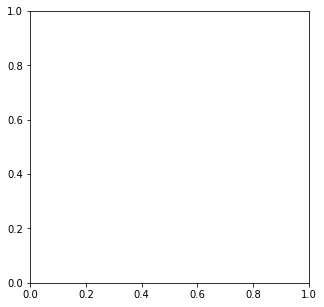

In [66]:
fig=plt.figure(figsize=(5,5))
colors=map(lambda x:colmap[x+1],labels)
color1=list(colors)
plt.scatter(df['x'],df['y'],color=color1,alpha=0.5)
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx+1]) 
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()